<a href="https://colab.research.google.com/github/Satwikram/Sign-Language-Recognition/blob/dev/Sign%20Language%20Gesture%20Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Connecting to Kaggle

In [1]:
from google.colab import files

files.upload()


! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


### Downloading dataset

In [2]:
!kaggle datasets download -d grassknoted/asl-alphabet

 99% 1.02G/1.03G [00:09<00:00, 132MB/s]
100% 1.03G/1.03G [00:09<00:00, 117MB/s]


### Unzipping Dataset

In [ ]:
!unzip /content/asl-alphabet.zip

### Importing Dependencies

In [4]:
import numpy as np
import pandas as pd
import os
import shutil
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

### Loading Dataset

In [5]:
shutil.rmtree("/content/asl_alphabet_train/asl_alphabet_train/del")

In [6]:
shutil.rmtree("/content/asl_alphabet_train/asl_alphabet_train/nothing")

In [7]:
shutil.rmtree("/content/asl_alphabet_train/asl_alphabet_train/space")

In [8]:
uniq_labels = sorted(os.listdir('/content/asl_alphabet_train/asl_alphabet_train'))

In [9]:
uniq_labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [10]:
len(uniq_labels)

26

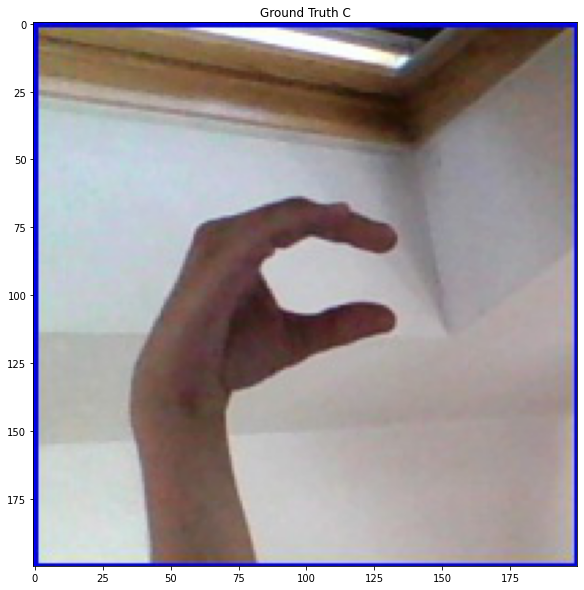

In [15]:
plt.figure(figsize = (10, 10))
plt.title('Ground Truth C')
plt.imshow(plt.imread('/content/asl_alphabet_train/asl_alphabet_train/C/C1001.jpg'))

### Function to load dataset

In [16]:
def imgPaths(filepath):

    labels = [str(filepath[i]).split("/")[-2] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [17]:
def imgPaths1(filepath):

    labels = [str(filepath[i]).split("/")[-1] \
              for i in range(len(filepath))]

    filepath = pd.Series(filepath, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    df = pd.concat([filepath, labels], axis=1)

    # Shuffle the DataFrame and reset index
    df = df.sample(frac=1).reset_index(drop = True)
    
    return df

In [18]:
train_image_dir = Path('/content/asl_alphabet_train/asl_alphabet_train')
train_filepaths = list(train_image_dir.glob(r'**/*.jpg'))

test_image_dir = Path('/content/asl_alphabet_test/asl_alphabet_test')
test_filepaths = list(test_image_dir.glob(r'**/*.jpg'))

In [19]:
train_df = imgPaths(train_filepaths)
test_df = imgPaths1(test_filepaths)

In [20]:
p = test_df["Label"].shape[0]

In [21]:
a=[]

for i in range(p):
    test_df["Label"][i]=test_df["Label"][i][:-9]

In [22]:
test_df

,Filepath,Label
0,/content/asl_alphabet_test/asl_alphabet_test/D...,D
1,/content/asl_alphabet_test/asl_alphabet_test/X...,X
2,/content/asl_alphabet_test/asl_alphabet_test/M...,M
3,/content/asl_alphabet_test/asl_alphabet_test/U...,U
4,/content/asl_alphabet_test/asl_alphabet_test/s...,space
5,/content/asl_alphabet_test/asl_alphabet_test/A...,A
6,/content/asl_alphabet_test/asl_alphabet_test/G...,G
7,/content/asl_alphabet_test/asl_alphabet_test/n...,nothing
8,/content/asl_alphabet_test/asl_alphabet_test/I...,I
9,/content/asl_alphabet_test/asl_alphabet_test/Q...,Q


In [23]:
df_unique = train_df.copy().drop_duplicates(subset=["Label"]).reset_index()

In [24]:
df_unique

,index,Filepath,Label
0,0,/content/asl_alphabet_train/asl_alphabet_train...,H
1,1,/content/asl_alphabet_train/asl_alphabet_train...,A
2,2,/content/asl_alphabet_train/asl_alphabet_train...,X
3,3,/content/asl_alphabet_train/asl_alphabet_train...,I
4,4,/content/asl_alphabet_train/asl_alphabet_train...,N
5,6,/content/asl_alphabet_train/asl_alphabet_train...,W
6,7,/content/asl_alphabet_train/asl_alphabet_train...,K
7,8,/content/asl_alphabet_train/asl_alphabet_train...,C
8,9,/content/asl_alphabet_train/asl_alphabet_train...,D
9,10,/content/asl_alphabet_train/asl_alphabet_train...,P


In [25]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [26]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(300, 300),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 62400 validated image filenames belonging to 26 classes.
Found 15600 validated image filenames belonging to 26 classes.
Found 28 validated image filenames belonging to 28 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


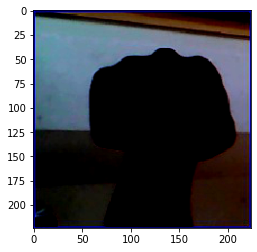

In [46]:
plt.imshow(train_images[9][0][0])

In [47]:
pretrainedModel = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
     include_top=False,
     weights='imagenet',
     pooling='avg'
)
pretrainedModel.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [48]:
inputs = pretrainedModel.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrainedModel.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)

outputs = tf.keras.layers.Dense(26, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

model.compile(
    optimizer=adam,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [49]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Sign Language Prediction/Gesture/model.h5',
                              monitor = 'val_loss',
                              save_best_only = True,
                              verbose = 1,
                              mode = 'min')

In [50]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor = 0.2,
                              patience = 2, min_lr = 0.001, verbose = 1)

In [51]:
def scheduler(epoch, lr):
  if epoch < 2:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [52]:
lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose = 1)

In [53]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0, 
                                             patience = 2, verbose = 1, mode='min',
                                             restore_best_weights = True)

In [57]:
from livelossplot.tf_keras import PlotLossesCallback
from livelossplot import PlotLossesKeras

In [58]:
callbacks = [checkpoint, reduce_lr, lr_schedule, earlystop, PlotLossesKeras()]

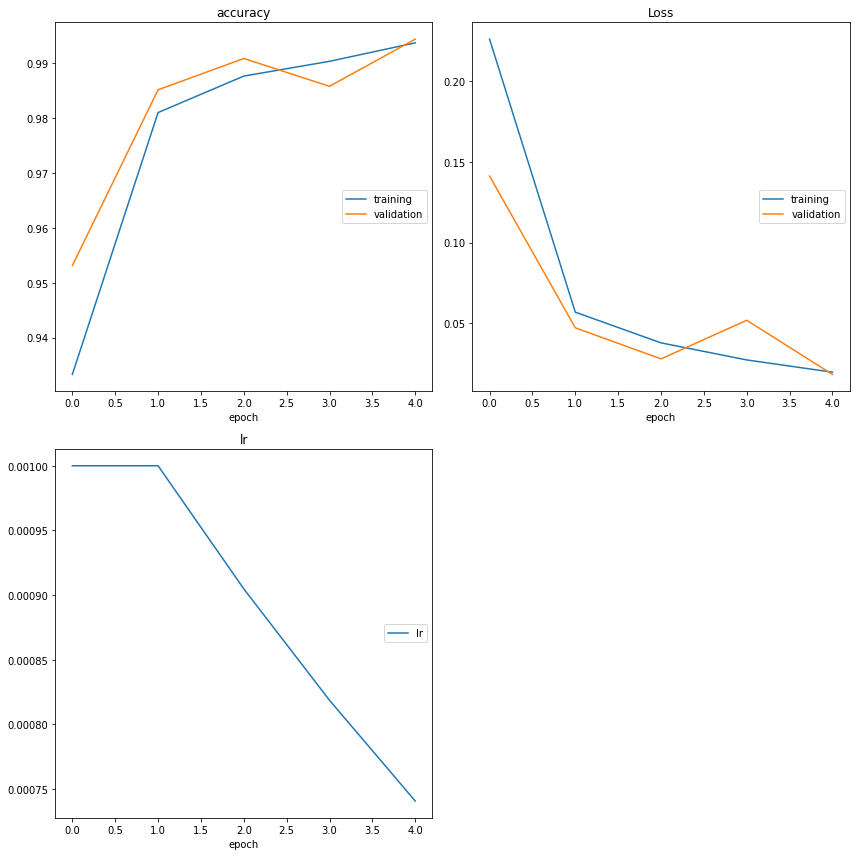

accuracy
	training         	 (min:    0.933, max:    0.994, cur:    0.994)
	validation       	 (min:    0.953, max:    0.994, cur:    0.994)
Loss
	training         	 (min:    0.020, max:    0.226, cur:    0.020)
	validation       	 (min:    0.018, max:    0.141, cur:    0.018)
lr
	lr               	 (min:    0.001, max:    0.001, cur:    0.001)


In [59]:
history = model.fit(
    train_images,
    validation_data=val_images,
    epochs = 5,
    callbacks = callbacks)
     

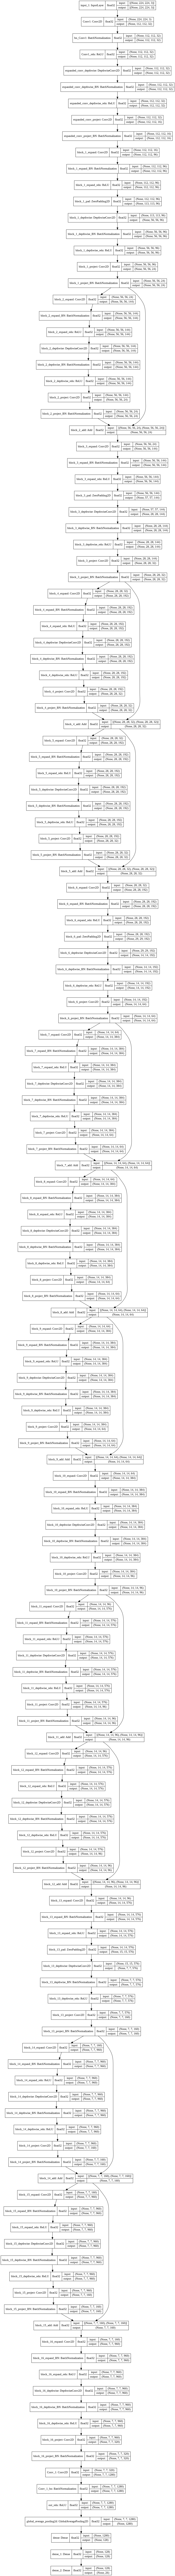

In [60]:
tf.keras.utils.plot_model(model, '/content/drive/MyDrive/Sign Language Prediction/Gesture/mobilenet.png', show_shapes = True, show_dtype = True,
                           show_layer_names = True, rankdir='TB', expand_nested = True)

In [ ]:
import joblib

joblib.dump(history, '/content/drive/MyDrive/Sign Language Prediction/Gesture/history.pickle')